In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load train and test datasets
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

print(train.shape, test.shape)
train.head()

(1460, 81) (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train = train.drop(columns='Id' ,axis = 1)
test = test.drop(columns='Id' ,axis = 1)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# quick info of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# total n.o of missing values in each column
train.isnull().sum().sort_values(ascending=False).head(12)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
dtype: int64

In [7]:
# perecentage of missing values
train.isnull().mean() * 100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

Columns with missing values:

              missing_count  missing_pct
PoolQC                 1453    99.520548
MiscFeature            1406    96.301370
Alley                  1369    93.767123
Fence                  1179    80.753425
MasVnrType              872    59.726027
FireplaceQu             690    47.260274
LotFrontage             259    17.739726
GarageType               81     5.547945
GarageYrBlt              81     5.547945
GarageFinish             81     5.547945
GarageQual               81     5.547945
GarageCond               81     5.547945
BsmtFinType2             38     2.602740
BsmtExposure             38     2.602740
BsmtFinType1             37     2.534247


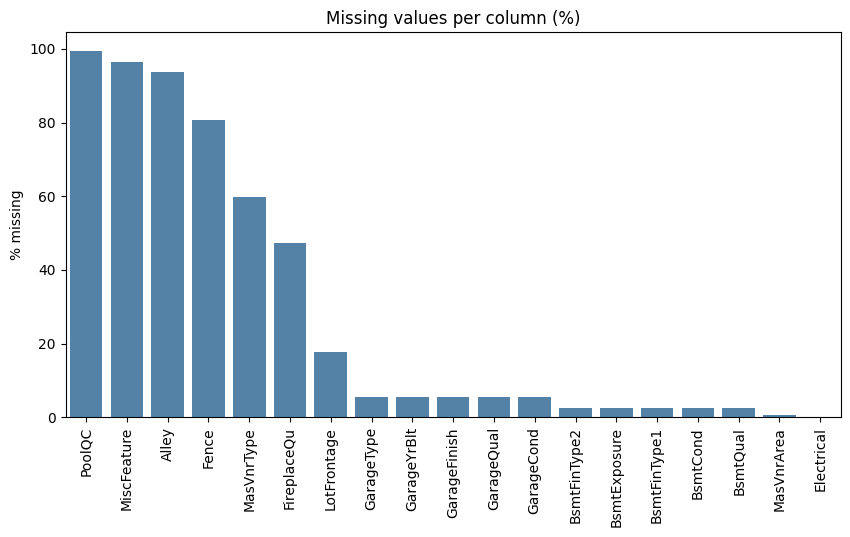

In [8]:
# missing values summary

# table
missing_counts = train.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
missing_pct = (missing_counts / len(train)) * 100
missing_df = pd.DataFrame({"missing_count": missing_counts, "missing_pct": missing_pct})

print("Columns with missing values:\n")
print(missing_df.head(15))

# plot
plt.figure(figsize=(10,5))
sns.barplot(x=missing_df.index, y=missing_df.missing_pct, color="steelblue")
plt.xticks(rotation=90)
plt.ylabel("% missing")
plt.title("Missing values per column (%)")
plt.show()

Note : Columns like PoolQC, Alley, and MiscFeature have >95% missing values, meaning they provide little value. I decided to drop them. For Fence (80% missing), I may keep it by treating “missing” as “no fence,” but dropping is also acceptable depending on downstream modeling needs.

In [9]:
columns_to_drop = ['PoolQC' ,'Alley' ,'MiscFeature']
# training data
train = train.drop(columns=columns_to_drop , axis = 1)
# testing data
test = test.drop(columns=columns_to_drop , axis = 1)
print("Remaining cols after drop :" ,train.shape[1])

Remaining cols after drop : 77


Note : I dropped PoolQC, Alley, and MiscFeature since they had >95% missing values and were unlikely to add predictive value.

In [10]:
# Categorical features where NA means "None"
cat_fill_none = [
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'MasVnrType'
]

for col in cat_fill_none:
    train[col] = train[col].fillna("None")
    test[col]  = test[col].fillna("None")

# Numerical features where NA means 0 (not present)
num_fill_zero = [
    'GarageYrBlt', 'GarageArea', 'GarageCars',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    'BsmtFullBath', 'BsmtHalfBath',
    'MasVnrArea'
]

for col in num_fill_zero:
    train[col] = train[col].fillna(0)
    test[col]  = test[col].fillna(0)

Note : I treated missing values in garage, basement, fireplace, and masonry features as structural absence. Categorical fields (e.g., GarageType, BsmtQual) were filled with "None", while numeric fields (e.g., MasVnrArea, BsmtFinSF1) were filled with 0. This preserves the true meaning of “not present.”

In [11]:
train['LotFrontage'] =train.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

Note : Since lot sizes are influenced by neighborhood planning, I imputed missing LotFrontage values with the median frontage of the respective Neighborhood. This preserves locality patterns and avoids bias from using a single global statistic.

In [12]:
train['Fence']=  train['Fence'].fillna('None')
test['Fence']=  test['Fence'].fillna('None')

In [13]:
# checking back again , if any missing values are left
print(train.isnull().sum().sort_values(ascending = False).head(10))
print(test.isnull().sum().sort_values(ascending = False).head(10))

Electrical      1
BedroomAbvGr    0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
HalfBath        0
dtype: int64
MSZoning        4
Utilities       2
Functional      2
Exterior2nd     1
SaleType        1
Exterior1st     1
KitchenQual     1
KitchenAbvGr    0
GarageType      0
FireplaceQu     0
dtype: int64


In [14]:
# fill Electrical in train
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

# Fill categorical vars in test with mode
for col in ['MSZoning', 'Utilities', 'Functional', 'Exterior1st',
            'Exterior2nd', 'KitchenQual', 'SaleType']:
    test[col] = test[col].fillna(test[col].mode()[0])

Note : I imputed the few remaining categorical missing values with their respective most frequent category (mode). This ensures minimal distortion, since the percentage of missingness was tiny (<0.5%).

In [15]:
# checking back again , if any missing values are left
print(train.isnull().sum().sort_values(ascending = False).head(10))
print(test.isnull().sum().sort_values(ascending = False).head(10))

MSSubClass      0
BedroomAbvGr    0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
HalfBath        0
dtype: int64
MSSubClass      0
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


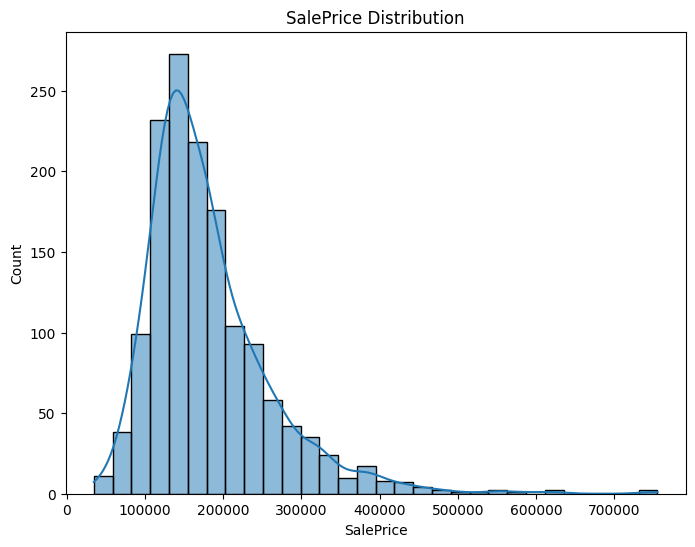

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(train["SalePrice"], kde=True, bins=30)
plt.title("SalePrice Distribution")
plt.savefig("saleprice_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

In [17]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90, save_path=None):
    corr = dataframe.corr(numeric_only=True)
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    if plot:
        sns.set_theme(rc={"figure.figsize": (15, 15)})
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", annot_kws={"size": 7})
        
        if save_path:  
            plt.savefig(save_path, dpi=300, bbox_inches="tight")  # saves the figure
        plt.show()

    return drop_list

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


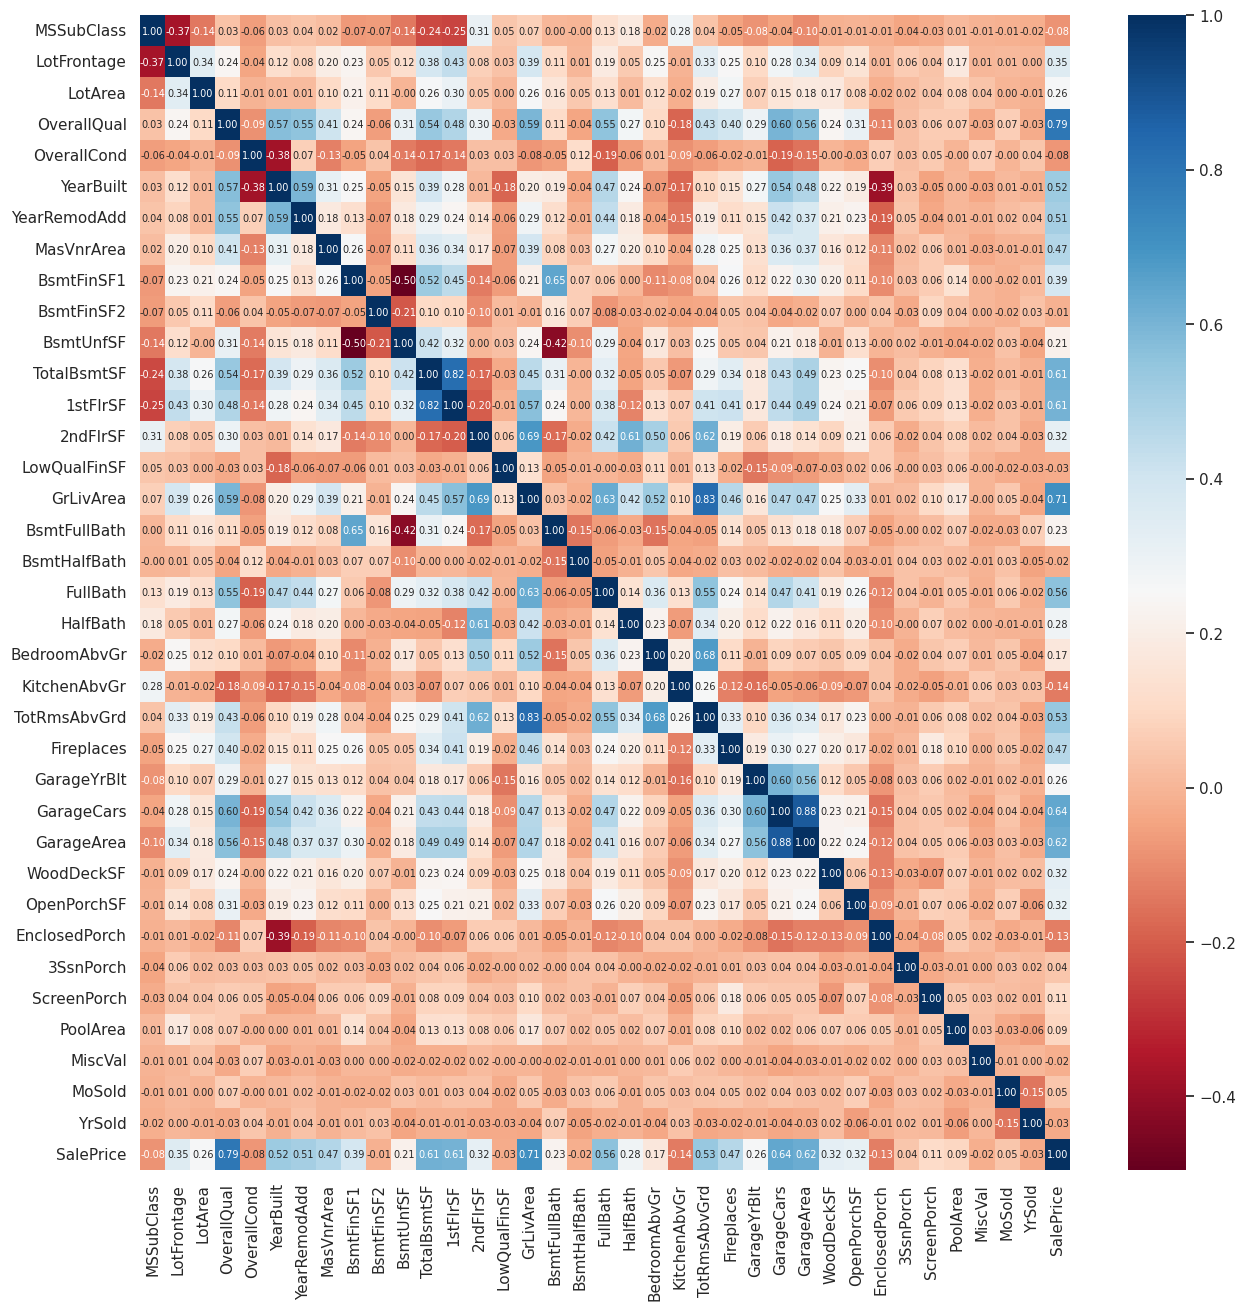

[]

In [18]:
high_correlated_cols(train, plot=True, save_path="correlation_heatmap.png")

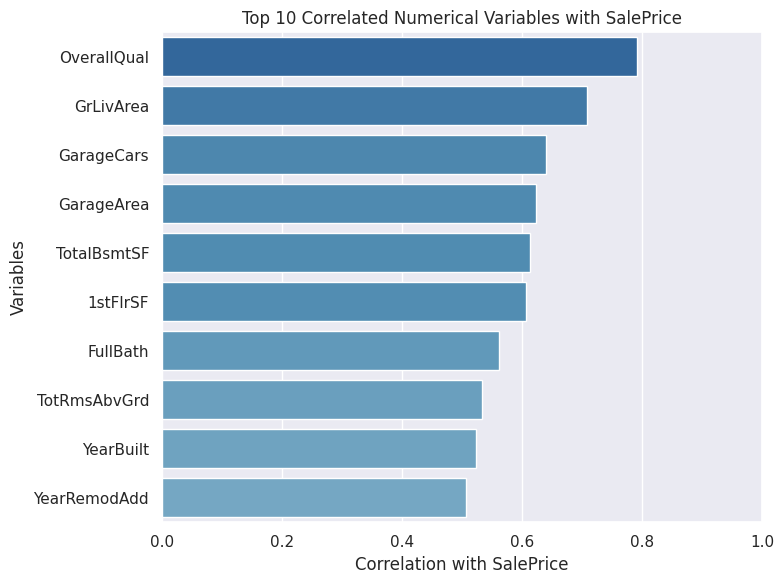

In [19]:
def plot_top_correlated_vars(dataframe, target_col, top_n=10, save_path=None, use_abs=True):
    if target_col not in dataframe.columns:
        raise KeyError(
            f"Column '{target_col}' not found in dataframe.\n"
            f"Available columns: {list(dataframe.columns)}"
        )
    
    # Calculate correlations with the target column
    corr = dataframe.corr(numeric_only=True)[target_col].drop(target_col)
    
    # Keep or take abs
    if use_abs:
        top_corr = corr.abs().sort_values(ascending=False).head(top_n)
    else:
        top_corr = corr.sort_values(key=abs, ascending=False).head(top_n)
    
    # Prepare color mapping from RdBu colormap
    cmap = plt.get_cmap("RdBu")
    norm = plt.Normalize(-1, 1)  # correlation range
    colors = [cmap(norm(val)) for val in top_corr.values]

    # Plot horizontal bar chart
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=top_corr.values,
        y=top_corr.index,
        palette=colors
    )
    plt.xlabel(f"Correlation with {target_col}")
    plt.ylabel("Variables")
    plt.title(f"Top {top_n} Correlated Numerical Variables with {target_col}")

    # Match axis to correlation range
    if use_abs:
        plt.xlim(0, 1)
    else:
        plt.xlim(-1, 1)
    
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

plot_top_correlated_vars(train, target_col="SalePrice", top_n=10, save_path="top10_vars.png")

### Boxplots of SalePrice vs Numerical

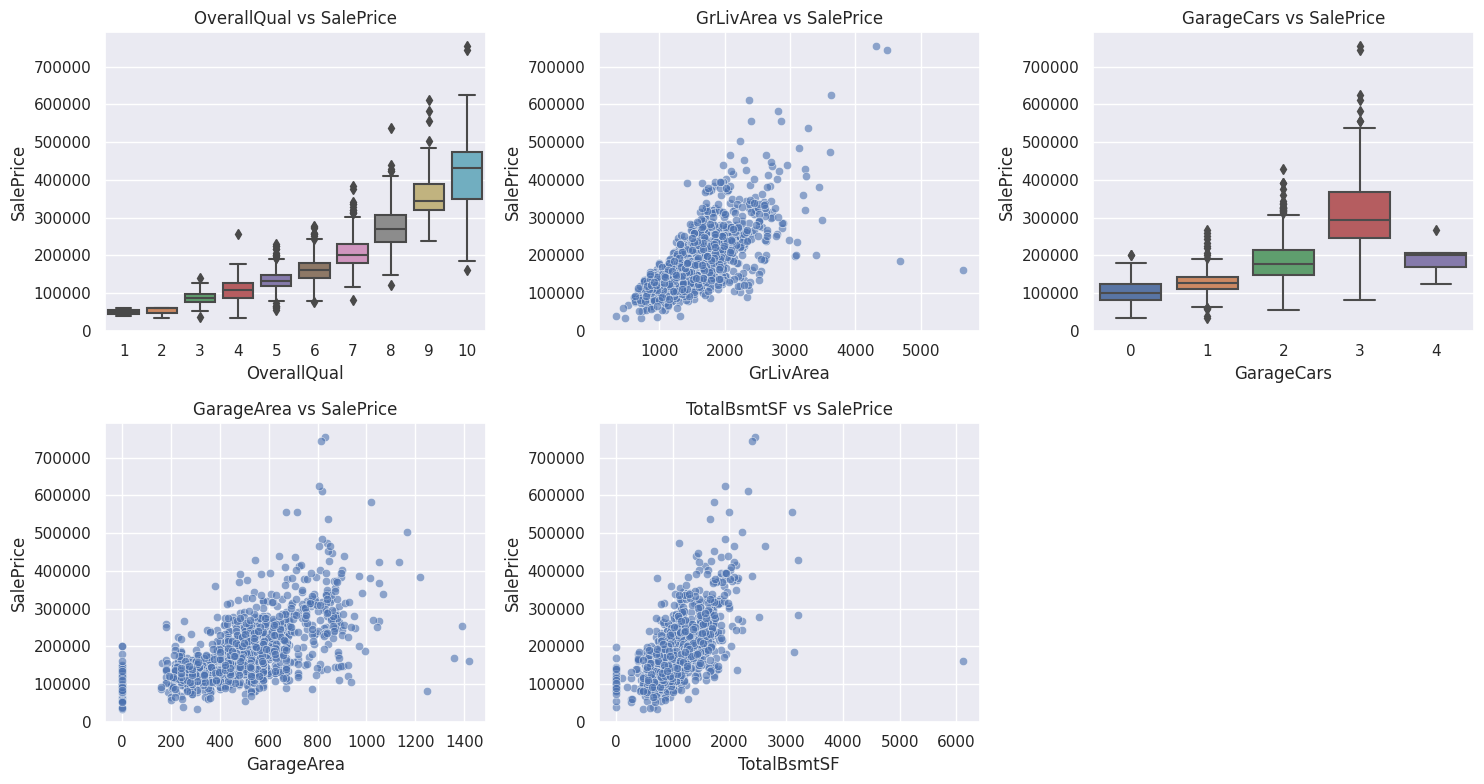

In [20]:
top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

plt.figure(figsize=(15,8))

for i, col in enumerate(top_features, 1):
    plt.subplot(2, 3, i)

    if train[col].nunique() < 15:
        sns.boxplot(x=col, y='SalePrice', data=train)
    else:
        sns.scatterplot(x=col, y='SalePrice', data=train, alpha=0.6)

    plt.title(f"{col} vs SalePrice")

plt.tight_layout()
plt.savefig("saleprice_vs_numerical_vars.png", dpi=300, bbox_inches="tight")
plt.show()

OverallQual: Strongest driver — prices rise almost exponentially with quality.

GrLivArea: Bigger living area → higher price, but watch for outliers (very large homes priced lower than expected).

GarageCars: Prices increase with garage capacity, but maxes out around 3–4 cars.

GarageArea: Positive trend, but weaker than GarageCars.

TotalBsmtSF: Larger basements → higher price, though effect is weaker than living area.

### Boxplots of SalePrice vs Category

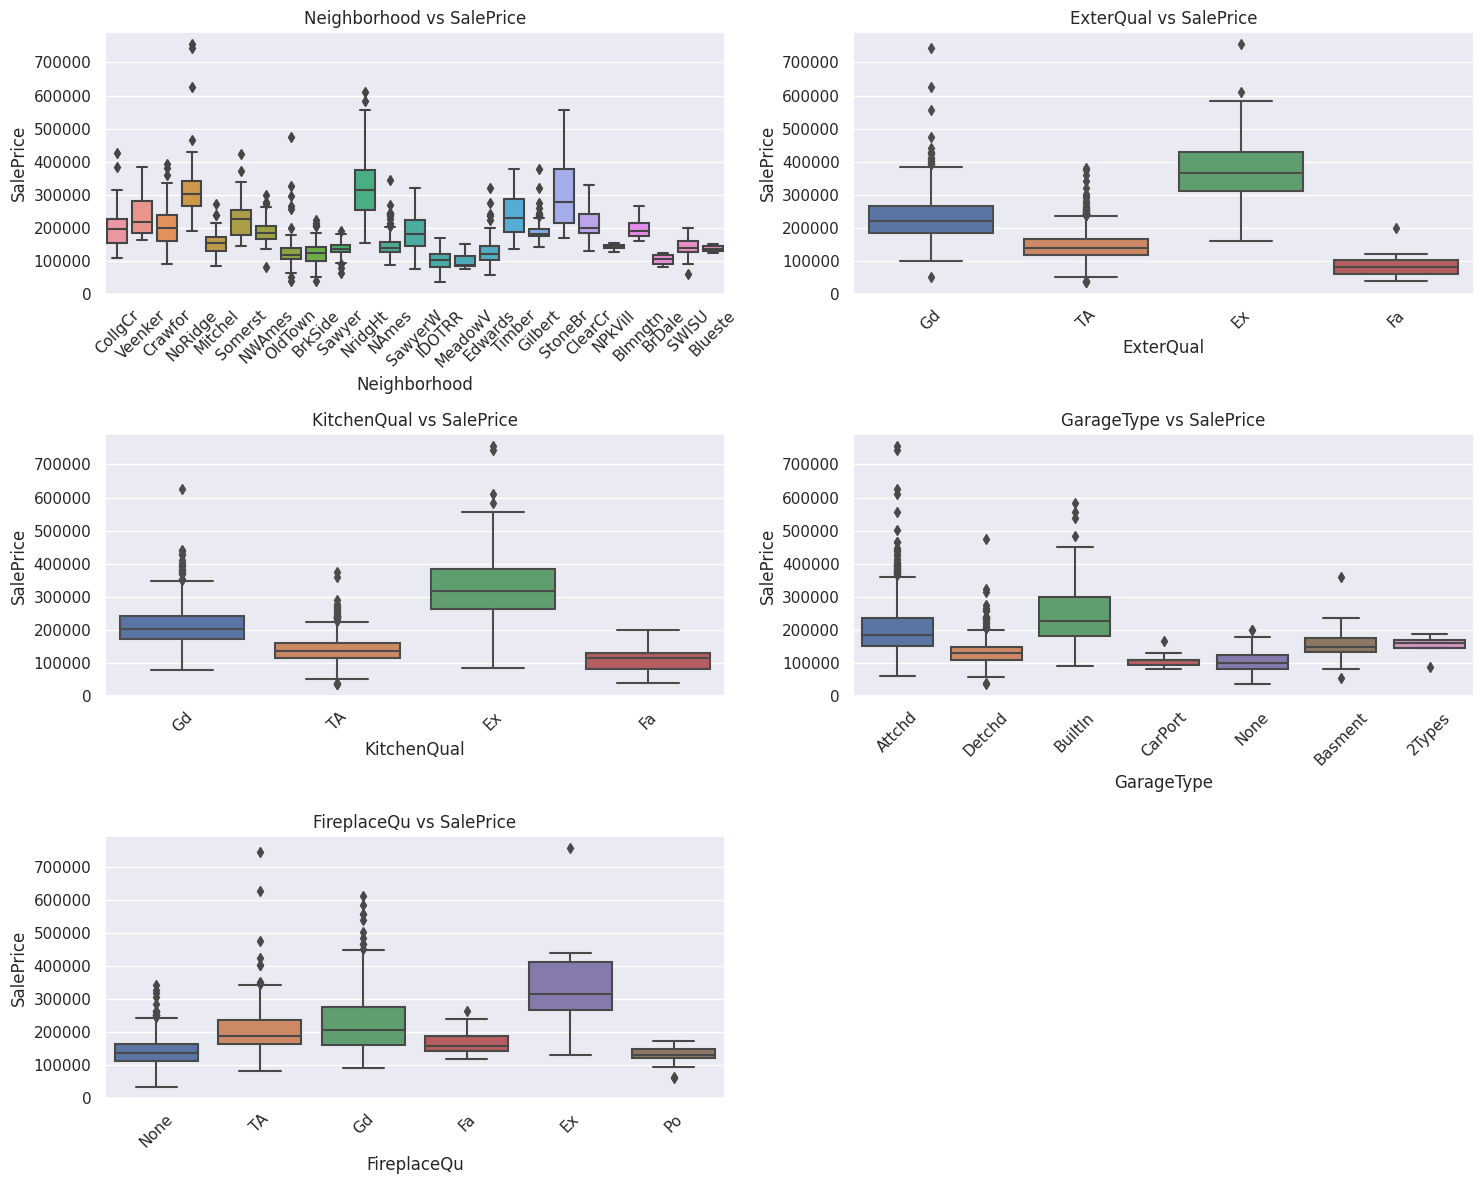

In [21]:
top_cat_features = ['Neighborhood', 'ExterQual', 'KitchenQual', 'GarageType', 'FireplaceQu']

plt.figure(figsize=(15,12))

for i, col in enumerate(top_cat_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=col, y='SalePrice', data=train)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs SalePrice")

plt.tight_layout()
plt.savefig("saleprice_vs_categorical_vars.png", dpi=300, bbox_inches="tight")
plt.show()

Neighborhood: Location heavily influences price — some neighborhoods consistently have higher prices.

ExterQual & KitchenQual: Higher quality materials/finish → higher sale prices.

GarageType: Presence and type of garage affects prices moderately.

FireplaceQu: Quality of fireplace adds value, though effect is less than overall quality or living area.